In [1]:
import os, cv2
import matplotlib.pyplot as plt

In [2]:
# directory of the images
DIR_IMAGES = "samples/images/"

# filepath to the labels
PATH_LABELS = "samples/labels/pictor_bew_v202_912p_sample.txt"

In [3]:
with open(PATH_LABELS, 'r') as f:
    for line in f.readlines():
        # each line contains labels for each image
        print("ANNOTATION LINE:\n", line, '\n')

        # at each line, informaions are separated by a tab character ('\t')
        info = line.split("\t")
        
        # first piece of info is the file name of the image
        filename = info[0]
        print("IMAGE FILE NAME:", filename)
        
        # check if the image exists in the folder
        image_filepath = os.path.join(DIR_IMAGES, filename)
        if not os.path.exists(image_filepath):
            print("file not found:", image_filepath)
            break
        
        # read the image
        img = cv2.imread(image_filepath)

        # convert BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # next pieces of info are the boxes of 
        for i, box in enumerate(info[1:]):
            print(f"BOX NO {i}:", box)

            # each box contains 5 values
            # x0, y0, x1, y1, c

            # split the information and convert to integer
            box_info_list = box.split(",")
            box_info = [int(x) for x in box_info_list]
            x0, y0, x1, y1, c = box_info
            
            # (x0,y0) is the top-left corner point
            # (x1,y1) is the bottom-right corner point
            # c is the class

            # c = 0 : BUILDING
            # c = 1 : EQUIPMENT
            # c = 2 : WORKER

            # choose some color to show different classes
            if c == 0:
                color = (255,0,0) # RED for BUILDING
            elif c == 1:
                color = (0,255,0) # GREEN for EQUIPMENT
            elif c == 2:
                color = (0,0,255) # BLUE for WORKER
            
            # draw rectangle for each box
            img = cv2.rectangle(img, (x0,y0), (x1,y1), color, 2)

        # breaking the loop to show only one sample
        break

ANNOTATION LINE:
 image_from_china(1).jpg	0,79,586,311,0	687,1,1221,301,0	66,303,400,444,1	522,299,713,405,1	992,366,1040,511,2	817,360,831,400,2	860,366,879,386,2 

IMAGE FILE NAME: image_from_china(1).jpg
BOX NO 0: 0,79,586,311,0
BOX NO 1: 687,1,1221,301,0
BOX NO 2: 66,303,400,444,1
BOX NO 3: 522,299,713,405,1
BOX NO 4: 992,366,1040,511,2
BOX NO 5: 817,360,831,400,2
BOX NO 6: 860,366,879,386,2


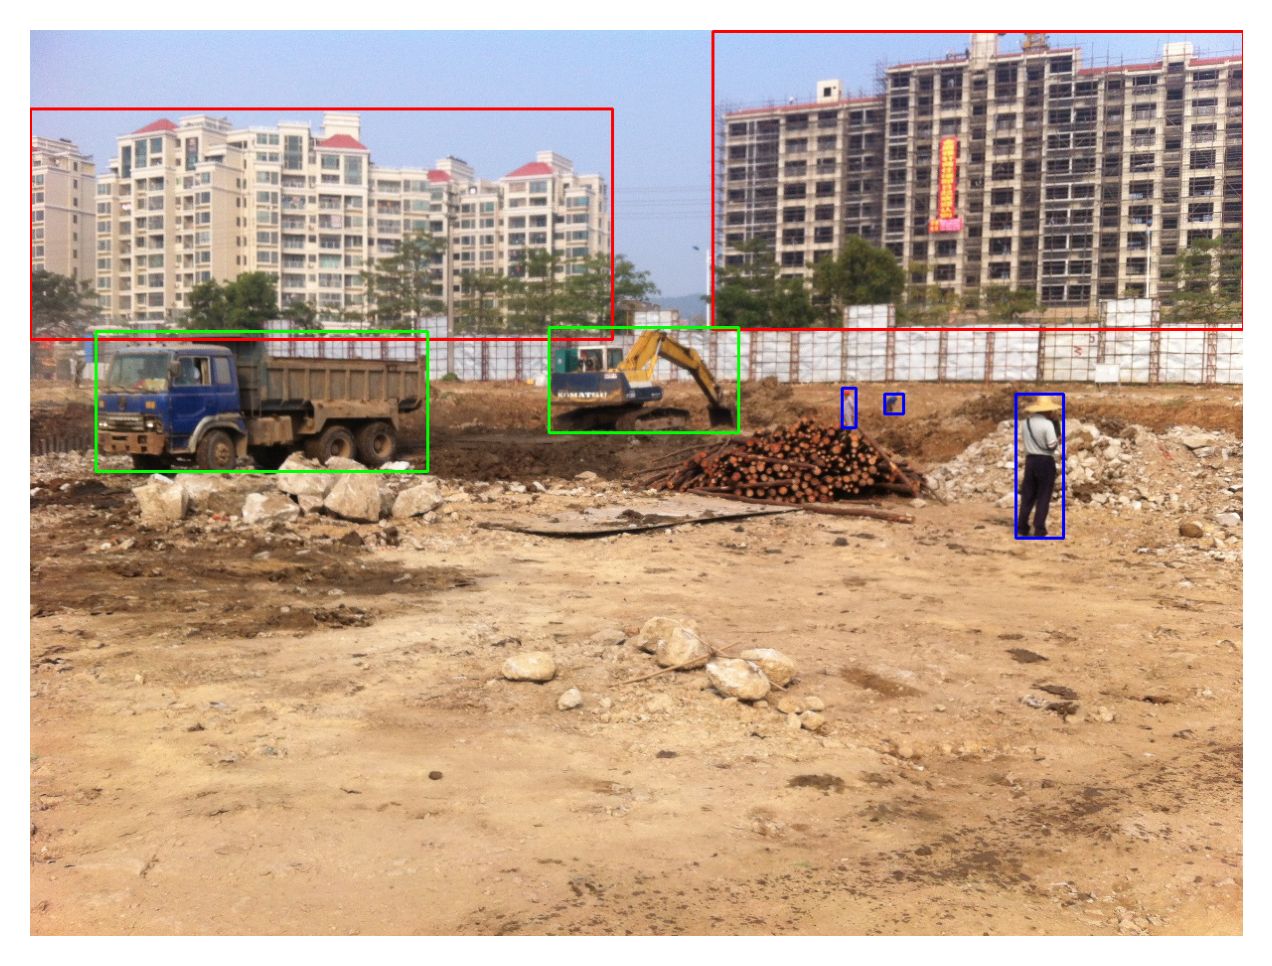

In [4]:
# visualize the image
plt.figure(dpi=300)
plt.imshow(img)
plt.axis("off")
plt.show()